# Model performance figures

In [66]:
import numpy as np
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle
%matplotlib inline
plt.rcParams.update({'font.size': 14})

**NOTE**: Need to go back and replace the reported performance figures from the original domains with performance figures that I generate using my own performance evaluation script. This is because (1) the reported figures have no CI, and (2) for relations, the models are evaluated in their original domains with strictness for type and direction, whereas my script is much more generous, so the comparison of scores isn't fair (the models will perform better in their own domains with my script). 

## Read in data

### DyGIE++

In [2]:
dygiepp_perf = pd.read_csv('../data/straying_off_topic_data/model_output/dygiepp/16Nov2022_FINAL_PERF/performance/16Nov2022_final_perf_model_performance.csv')

In [3]:
dygiepp_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI
0,16Nov2022_final_perf_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449888,0.628164,0.523937,0.060647,0.081696,0.069041,"(0.40439214269074314, 0.5008054387405285)","(0.5840552539849232, 0.6648429250138644)","(0.47723081409778145, 0.5630683343028892)","(0.0326858956547759, 0.09351438492063491)","(0.0493649307518372, 0.12081369454293868)","(0.03953898676118002, 0.10102081138040034)"
1,16Nov2022_final_perf_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.599703,0.181695,0.278212,NaN,NaN,NaN,"(0.5272893044227837, 0.6650549566687803)","(0.13606189935093155, 0.23071732048989266)","(0.2197894579755383, 0.3370481270205646)",NaN,NaN,NaN
2,16Nov2022_final_perf_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.551087,0.201089,0.293874,NaN,NaN,NaN,"(0.48322793074084586, 0.6199419927206551)","(0.14999244675350565, 0.2519445120763537)","(0.23128161208164436, 0.3522933014714589)",NaN,NaN,NaN
3,16Nov2022_final_perf_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.183770,0.065254,0.096164,0.000000,0.000000,0.000000,"(0.13442883076716197, 0.23937174424230148)","(0.047061800108090836, 0.0858836070433561)","(0.070124019939222, 0.12594227907648572)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
4,16Nov2022_final_perf_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.450075,0.632486,0.525524,0.050674,0.073107,0.059547,"(0.40188652861833635, 0.49872020973892317)","(0.5929452484208924, 0.6674917421516195)","(0.4854933738220587, 0.5635635892755306)","(0.029163461299848627, 0.07499864416211577)","(0.045197783423865434, 0.10622159745028417)","(0.03640861742424242, 0.0853452330974624)"


In [4]:
dygiepp_perf['model_name'] = 'DyGIE++ ' + dygiepp_perf['pred_file'].str.split('_').str[5]

In [5]:
dygiepp_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,16Nov2022_final_perf_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449888,0.628164,0.523937,0.060647,0.081696,0.069041,"(0.40439214269074314, 0.5008054387405285)","(0.5840552539849232, 0.6648429250138644)","(0.47723081409778145, 0.5630683343028892)","(0.0326858956547759, 0.09351438492063491)","(0.0493649307518372, 0.12081369454293868)","(0.03953898676118002, 0.10102081138040034)",DyGIE++ scierc-lightweight
1,16Nov2022_final_perf_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.599703,0.181695,0.278212,NaN,NaN,NaN,"(0.5272893044227837, 0.6650549566687803)","(0.13606189935093155, 0.23071732048989266)","(0.2197894579755383, 0.3370481270205646)",NaN,NaN,NaN,DyGIE++ genia-lightweight
2,16Nov2022_final_perf_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.551087,0.201089,0.293874,NaN,NaN,NaN,"(0.48322793074084586, 0.6199419927206551)","(0.14999244675350565, 0.2519445120763537)","(0.23128161208164436, 0.3522933014714589)",NaN,NaN,NaN,DyGIE++ genia
3,16Nov2022_final_perf_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.183770,0.065254,0.096164,0.000000,0.000000,0.000000,"(0.13442883076716197, 0.23937174424230148)","(0.047061800108090836, 0.0858836070433561)","(0.070124019939222, 0.12594227907648572)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",DyGIE++ ace05-relation
4,16Nov2022_final_perf_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.450075,0.632486,0.525524,0.050674,0.073107,0.059547,"(0.40188652861833635, 0.49872020973892317)","(0.5929452484208924, 0.6674917421516195)","(0.4854933738220587, 0.5635635892755306)","(0.029163461299848627, 0.07499864416211577)","(0.045197783423865434, 0.10622159745028417)","(0.03640861742424242, 0.0853452330974624)",DyGIE++ scierc


#### Add performances computed on original domain datasets

In [6]:
orig_dygiepp_perf_scierc = pd.read_csv('../data/straying_off_topic_data/model_output/original_datasets/performance/dygiepp_scierc_original_perf_job_model_performance.csv')
orig_dygiepp_perf_genia = pd.read_csv('../data/straying_off_topic_data/model_output/original_datasets/performance/dygiepp_genia_original_perf_job_model_performance.csv')

In [7]:
orig_dygiepp_perf_scierc['model_name'] = 'DyGIE++ ' + orig_dygiepp_perf_scierc['pred_file'].str.split('_').str[6]

In [8]:
orig_dygiepp_perf_scierc.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,dygiepp_scierc_original_perf_job_test_scierc_p...,test.json,0.794354,0.817202,0.805579,0.616616,0.443175,0.515473,"(0.7688669247379356, 0.8193968293753555)","(0.7899967712711505, 0.8421942101815175)","(0.7823772654360929, 0.8292615413042242)","(0.5732610337459475, 0.6614786807580174)","(0.4062389758179232, 0.4853477153924101)","(0.47920009874453384, 0.5554503819572163)",DyGIE++ scierc
1,dygiepp_scierc_original_perf_job_test_scierc-l...,test.json,0.781797,0.813631,0.797359,0.618954,0.461536,0.528572,"(0.7594586571419857, 0.803306289256054)","(0.7893024086075972, 0.8351607132349486)","(0.7775144013852646, 0.8156444011875782)","(0.5722358660785887, 0.6635833236323087)","(0.41926930596285433, 0.5026881942662751)","(0.4894900585481012, 0.5628794604823015)",DyGIE++ scierc-lightweight


In [9]:
orig_dygiepp_perf_genia['model_name'] = 'DyGIE++ ' + orig_dygiepp_perf_genia['pred_file'].str.split('_').str[6]

In [10]:
orig_dygiepp_perf_genia.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,dygiepp_genia_original_perf_job_test_genia-lig...,test.json,0.844062,0.752728,0.795757,NaN,NaN,NaN,"(0.8300141984583056, 0.8578769754598758)","(0.7350278369096913, 0.7698233031151941)","(0.7827790519165085, 0.8085886587740776)",NaN,NaN,NaN,DyGIE++ genia-lightweight
1,dygiepp_genia_original_perf_job_test_genia_pre...,test.json,0.817575,0.776577,0.796528,NaN,NaN,NaN,"(0.8029709413776704, 0.8305085770006524)","(0.7589261207961184, 0.7934460552448153)","(0.7828860605209547, 0.8095895439237504)",NaN,NaN,NaN,DyGIE++ genia


In [11]:
orig_dygiepp_perf = pd.concat([orig_dygiepp_perf_genia, orig_dygiepp_perf_scierc])
orig_dygiepp_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,dygiepp_genia_original_perf_job_test_genia-lig...,test.json,0.844062,0.752728,0.795757,NaN,NaN,NaN,"(0.8300141984583056, 0.8578769754598758)","(0.7350278369096913, 0.7698233031151941)","(0.7827790519165085, 0.8085886587740776)",NaN,NaN,NaN,DyGIE++ genia-lightweight
1,dygiepp_genia_original_perf_job_test_genia_pre...,test.json,0.817575,0.776577,0.796528,NaN,NaN,NaN,"(0.8029709413776704, 0.8305085770006524)","(0.7589261207961184, 0.7934460552448153)","(0.7828860605209547, 0.8095895439237504)",NaN,NaN,NaN,DyGIE++ genia
0,dygiepp_scierc_original_perf_job_test_scierc_p...,test.json,0.794354,0.817202,0.805579,0.616616,0.443175,0.515473,"(0.7688669247379356, 0.8193968293753555)","(0.7899967712711505, 0.8421942101815175)","(0.7823772654360929, 0.8292615413042242)","(0.5732610337459475, 0.6614786807580174)","(0.4062389758179232, 0.4853477153924101)","(0.47920009874453384, 0.5554503819572163)",DyGIE++ scierc
1,dygiepp_scierc_original_perf_job_test_scierc-l...,test.json,0.781797,0.813631,0.797359,0.618954,0.461536,0.528572,"(0.7594586571419857, 0.803306289256054)","(0.7893024086075972, 0.8351607132349486)","(0.7775144013852646, 0.8156444011875782)","(0.5722358660785887, 0.6635833236323087)","(0.41926930596285433, 0.5026881942662751)","(0.4894900585481012, 0.5628794604823015)",DyGIE++ scierc-lightweight


In [12]:
all_dygiepp_perf = pd.merge(dygiepp_perf, orig_dygiepp_perf, how='outer', on='model_name', suffixes=('_pickle', '_original'))
all_dygiepp_perf.head()

,pred_file_pickle,gold_std_file_pickle,ent_precision_pickle,ent_recall_pickle,ent_F1_pickle,rel_precision_pickle,rel_recall_pickle,rel_F1_pickle,ent_precision_CI_pickle,ent_recall_CI_pickle,...,ent_F1_original,rel_precision_original,rel_recall_original,rel_F1_original,ent_precision_CI_original,ent_recall_CI_original,ent_F1_CI_original,rel_precision_CI_original,rel_recall_CI_original,rel_F1_CI_original
0,16Nov2022_final_perf_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449888,0.628164,0.523937,0.060647,0.081696,0.069041,"(0.40439214269074314, 0.5008054387405285)","(0.5840552539849232, 0.6648429250138644)",...,0.797359,0.618954,0.461536,0.528572,"(0.7594586571419857, 0.803306289256054)","(0.7893024086075972, 0.8351607132349486)","(0.7775144013852646, 0.8156444011875782)","(0.5722358660785887, 0.6635833236323087)","(0.41926930596285433, 0.5026881942662751)","(0.4894900585481012, 0.5628794604823015)"
1,16Nov2022_final_perf_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.599703,0.181695,0.278212,NaN,NaN,NaN,"(0.5272893044227837, 0.6650549566687803)","(0.13606189935093155, 0.23071732048989266)",...,0.795757,NaN,NaN,NaN,"(0.8300141984583056, 0.8578769754598758)","(0.7350278369096913, 0.7698233031151941)","(0.7827790519165085, 0.8085886587740776)",NaN,NaN,NaN
2,16Nov2022_final_perf_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.551087,0.201089,0.293874,NaN,NaN,NaN,"(0.48322793074084586, 0.6199419927206551)","(0.14999244675350565, 0.2519445120763537)",...,0.796528,NaN,NaN,NaN,"(0.8029709413776704, 0.8305085770006524)","(0.7589261207961184, 0.7934460552448153)","(0.7828860605209547, 0.8095895439237504)",NaN,NaN,NaN
3,16Nov2022_final_perf_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.183770,0.065254,0.096164,0.000000,0.000000,0.000000,"(0.13442883076716197, 0.23937174424230148)","(0.047061800108090836, 0.0858836070433561)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16Nov2022_final_perf_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.450075,0.632486,0.525524,0.050674,0.073107,0.059547,"(0.40188652861833635, 0.49872020973892317)","(0.5929452484208924, 0.6674917421516195)",...,0.805579,0.616616,0.443175,0.515473,"(0.7688669247379356, 0.8193968293753555)","(0.7899967712711505, 0.8421942101815175)","(0.7823772654360929, 0.8292615413042242)","(0.5732610337459475, 0.6614786807580174)","(0.4062389758179232, 0.4853477153924101)","(0.47920009874453384, 0.5554503819572163)"


In [13]:
# Common-sense check to make sure the merge worked
all_dygiepp_perf[['model_name', 'ent_F1_pickle', 'ent_F1_original', 'rel_F1_pickle', 'rel_F1_original']]

,model_name,ent_F1_pickle,ent_F1_original,rel_F1_pickle,rel_F1_original
0,DyGIE++ scierc-lightweight,0.523937,0.797359,0.069041,0.528572
1,DyGIE++ genia-lightweight,0.278212,0.795757,NaN,NaN
2,DyGIE++ genia,0.293874,0.796528,NaN,NaN
3,DyGIE++ ace05-relation,0.096164,NaN,0.000000,NaN
4,DyGIE++ scierc,0.525524,0.805579,0.059547,0.515473


### PURE

In [14]:
pure_perf = pd.read_csv('../data/straying_off_topic_data/model_output/pure/16Nov2022_FINAL_PERF/performance/combined_16Nov2022_final_perf_model_performance.csv')

In [15]:
pure_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI
0,combined_16Nov2022_final_perf_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.512541,0.692538,0.588805,0.034834,0.03692,0.035628,"(0.4621237264972249, 0.5629584404985656)","(0.6582328294158623, 0.720318096358461)","(0.5482680498933562, 0.6255676105315449)","(0.01345225460757921, 0.061991453604182546)","(0.014649527694289394, 0.06524399513529948)","(0.013628908461919593, 0.06052992113247037)"
1,combined_16Nov2022_final_perf_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.273944,0.043246,0.074642,0.000000,0.00000,0.000000,"(0.20212973582951013, 0.3575375939849624)","(0.03243377941364197, 0.05630698100673515)","(0.05648950266326698, 0.09620526520843765)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"


In [16]:
pure_perf['model_name'] = 'PURE ' + pure_perf['pred_file'].str.split('_').str[5]

In [17]:
pure_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,combined_16Nov2022_final_perf_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.512541,0.692538,0.588805,0.034834,0.03692,0.035628,"(0.4621237264972249, 0.5629584404985656)","(0.6582328294158623, 0.720318096358461)","(0.5482680498933562, 0.6255676105315449)","(0.01345225460757921, 0.061991453604182546)","(0.014649527694289394, 0.06524399513529948)","(0.013628908461919593, 0.06052992113247037)",PURE scierc
1,combined_16Nov2022_final_perf_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.273944,0.043246,0.074642,0.000000,0.00000,0.000000,"(0.20212973582951013, 0.3575375939849624)","(0.03243377941364197, 0.05630698100673515)","(0.05648950266326698, 0.09620526520843765)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",PURE ace05


#### Add the original model performances

In [18]:
orig_pure_perf_scierc = pd.read_csv('../data/straying_off_topic_data/model_output/original_datasets/performance/combined_pure_scierc_orig_perf_model_performance.csv')
orig_pure_perf_scierc.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI
0,combined_pure_scierc_orig_perf_pure_scierc_rel...,test.json,0.780635,0.810688,0.795343,0.562873,0.479972,0.5179,"(0.7573847251898802, 0.8035928873207288)","(0.7870258498492306, 0.832095491379181)","(0.7750324544114845, 0.8154307120989182)","(0.5164048066772235, 0.607697015289525)","(0.43654785685319925, 0.5231194331983806)","(0.47860092738370497, 0.5546735115441573)"


In [19]:
orig_pure_perf_scierc['model_name'] = 'PURE ' + orig_pure_perf_scierc['pred_file'].str.split('_').str[6]

In [20]:
all_pure_perf = pd.merge(pure_perf, orig_pure_perf_scierc, how='outer', on='model_name', suffixes=('_pickle', '_original'))
all_pure_perf.head()

,pred_file_pickle,gold_std_file_pickle,ent_precision_pickle,ent_recall_pickle,ent_F1_pickle,rel_precision_pickle,rel_recall_pickle,rel_F1_pickle,ent_precision_CI_pickle,ent_recall_CI_pickle,...,ent_F1_original,rel_precision_original,rel_recall_original,rel_F1_original,ent_precision_CI_original,ent_recall_CI_original,ent_F1_CI_original,rel_precision_CI_original,rel_recall_CI_original,rel_F1_CI_original
0,combined_16Nov2022_final_perf_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.512541,0.692538,0.588805,0.034834,0.03692,0.035628,"(0.4621237264972249, 0.5629584404985656)","(0.6582328294158623, 0.720318096358461)",...,0.795343,0.562873,0.479972,0.5179,"(0.7573847251898802, 0.8035928873207288)","(0.7870258498492306, 0.832095491379181)","(0.7750324544114845, 0.8154307120989182)","(0.5164048066772235, 0.607697015289525)","(0.43654785685319925, 0.5231194331983806)","(0.47860092738370497, 0.5546735115441573)"
1,combined_16Nov2022_final_perf_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.273944,0.043246,0.074642,0.000000,0.00000,0.000000,"(0.20212973582951013, 0.3575375939849624)","(0.03243377941364197, 0.05630698100673515)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Combine all performances

In [21]:
all_perf = pd.concat([all_dygiepp_perf, all_pure_perf]).reset_index(drop=True)
all_perf

,pred_file_pickle,gold_std_file_pickle,ent_precision_pickle,ent_recall_pickle,ent_F1_pickle,rel_precision_pickle,rel_recall_pickle,rel_F1_pickle,ent_precision_CI_pickle,ent_recall_CI_pickle,...,ent_F1_original,rel_precision_original,rel_recall_original,rel_F1_original,ent_precision_CI_original,ent_recall_CI_original,ent_F1_CI_original,rel_precision_CI_original,rel_recall_CI_original,rel_F1_CI_original
0,16Nov2022_final_perf_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449888,0.628164,0.523937,0.060647,0.081696,0.069041,"(0.40439214269074314, 0.5008054387405285)","(0.5840552539849232, 0.6648429250138644)",...,0.797359,0.618954,0.461536,0.528572,"(0.7594586571419857, 0.803306289256054)","(0.7893024086075972, 0.8351607132349486)","(0.7775144013852646, 0.8156444011875782)","(0.5722358660785887, 0.6635833236323087)","(0.41926930596285433, 0.5026881942662751)","(0.4894900585481012, 0.5628794604823015)"
1,16Nov2022_final_perf_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.599703,0.181695,0.278212,NaN,NaN,NaN,"(0.5272893044227837, 0.6650549566687803)","(0.13606189935093155, 0.23071732048989266)",...,0.795757,NaN,NaN,NaN,"(0.8300141984583056, 0.8578769754598758)","(0.7350278369096913, 0.7698233031151941)","(0.7827790519165085, 0.8085886587740776)",NaN,NaN,NaN
2,16Nov2022_final_perf_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.551087,0.201089,0.293874,NaN,NaN,NaN,"(0.48322793074084586, 0.6199419927206551)","(0.14999244675350565, 0.2519445120763537)",...,0.796528,NaN,NaN,NaN,"(0.8029709413776704, 0.8305085770006524)","(0.7589261207961184, 0.7934460552448153)","(0.7828860605209547, 0.8095895439237504)",NaN,NaN,NaN
3,16Nov2022_final_perf_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.183770,0.065254,0.096164,0.000000,0.000000,0.000000,"(0.13442883076716197, 0.23937174424230148)","(0.047061800108090836, 0.0858836070433561)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16Nov2022_final_perf_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.450075,0.632486,0.525524,0.050674,0.073107,0.059547,"(0.40188652861833635, 0.49872020973892317)","(0.5929452484208924, 0.6674917421516195)",...,0.805579,0.616616,0.443175,0.515473,"(0.7688669247379356, 0.8193968293753555)","(0.7899967712711505, 0.8421942101815175)","(0.7823772654360929, 0.8292615413042242)","(0.5732610337459475, 0.6614786807580174)","(0.4062389758179232, 0.4853477153924101)","(0.47920009874453384, 0.5554503819572163)"
5,combined_16Nov2022_final_perf_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.512541,0.692538,0.588805,0.034834,0.036920,0.035628,"(0.4621237264972249, 0.5629584404985656)","(0.6582328294158623, 0.720318096358461)",...,0.795343,0.562873,0.479972,0.517900,"(0.7573847251898802, 0.8035928873207288)","(0.7870258498492306, 0.832095491379181)","(0.7750324544114845, 0.8154307120989182)","(0.5164048066772235, 0.607697015289525)","(0.43654785685319925, 0.5231194331983806)","(0.47860092738370497, 0.5546735115441573)"
6,combined_16Nov2022_final_perf_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.273944,0.043246,0.074642,0.000000,0.000000,0.000000,"(0.20212973582951013, 0.3575375939849624)","(0.03243377941364197, 0.05630698100673515)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
all_perf = all_perf.set_index('model_name')
all_perf = all_perf.sort_values('ent_F1_pickle', ascending=False)

In [25]:
all_perf

,pred_file_pickle,gold_std_file_pickle,ent_precision_pickle,ent_recall_pickle,ent_F1_pickle,rel_precision_pickle,rel_recall_pickle,rel_F1_pickle,ent_precision_CI_pickle,ent_recall_CI_pickle,...,ent_F1_original,rel_precision_original,rel_recall_original,rel_F1_original,ent_precision_CI_original,ent_recall_CI_original,ent_F1_CI_original,rel_precision_CI_original,rel_recall_CI_original,rel_F1_CI_original
model_name,,,,,,,,,,,,,,,,,,,,,
PURE scierc,combined_16Nov2022_final_perf_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.512541,0.692538,0.588805,0.034834,0.036920,0.035628,"(0.4621237264972249, 0.5629584404985656)","(0.6582328294158623, 0.720318096358461)",...,0.795343,0.562873,0.479972,0.517900,"(0.7573847251898802, 0.8035928873207288)","(0.7870258498492306, 0.832095491379181)","(0.7750324544114845, 0.8154307120989182)","(0.5164048066772235, 0.607697015289525)","(0.43654785685319925, 0.5231194331983806)","(0.47860092738370497, 0.5546735115441573)"
DyGIE++ scierc,16Nov2022_final_perf_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.450075,0.632486,0.525524,0.050674,0.073107,0.059547,"(0.40188652861833635, 0.49872020973892317)","(0.5929452484208924, 0.6674917421516195)",...,0.805579,0.616616,0.443175,0.515473,"(0.7688669247379356, 0.8193968293753555)","(0.7899967712711505, 0.8421942101815175)","(0.7823772654360929, 0.8292615413042242)","(0.5732610337459475, 0.6614786807580174)","(0.4062389758179232, 0.4853477153924101)","(0.47920009874453384, 0.5554503819572163)"
DyGIE++ scierc-lightweight,16Nov2022_final_perf_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449888,0.628164,0.523937,0.060647,0.081696,0.069041,"(0.40439214269074314, 0.5008054387405285)","(0.5840552539849232, 0.6648429250138644)",...,0.797359,0.618954,0.461536,0.528572,"(0.7594586571419857, 0.803306289256054)","(0.7893024086075972, 0.8351607132349486)","(0.7775144013852646, 0.8156444011875782)","(0.5722358660785887, 0.6635833236323087)","(0.41926930596285433, 0.5026881942662751)","(0.4894900585481012, 0.5628794604823015)"
DyGIE++ genia,16Nov2022_final_perf_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.551087,0.201089,0.293874,NaN,NaN,NaN,"(0.48322793074084586, 0.6199419927206551)","(0.14999244675350565, 0.2519445120763537)",...,0.796528,NaN,NaN,NaN,"(0.8029709413776704, 0.8305085770006524)","(0.7589261207961184, 0.7934460552448153)","(0.7828860605209547, 0.8095895439237504)",NaN,NaN,NaN
DyGIE++ genia-lightweight,16Nov2022_final_perf_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.599703,0.181695,0.278212,NaN,NaN,NaN,"(0.5272893044227837, 0.6650549566687803)","(0.13606189935093155, 0.23071732048989266)",...,0.795757,NaN,NaN,NaN,"(0.8300141984583056, 0.8578769754598758)","(0.7350278369096913, 0.7698233031151941)","(0.7827790519165085, 0.8085886587740776)",NaN,NaN,NaN
DyGIE++ ace05-relation,16Nov2022_final_perf_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.183770,0.065254,0.096164,0.000000,0.000000,0.000000,"(0.13442883076716197, 0.23937174424230148)","(0.047061800108090836, 0.0858836070433561)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PURE ace05,combined_16Nov2022_final_perf_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.273944,0.043246,0.074642,0.000000,0.000000,0.000000,"(0.20212973582951013, 0.3575375939849624)","(0.03243377941364197, 0.05630698100673515)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plots
We want to make bubble plots where the x-axis is entity performance, the y-axis is relation performance, and the size of the bubble is the standard deviation in each direction. I originally intended to color the bubbles by whether it's the performance on the original domain of the model, or the PICKLE corpus; however, this proved unhelpful because the bubbles for each group overlap to such a degree that they can't be usefully labeled. Instead, I'll generate a unique color for each model, using a lighter version of the color for the original domain performance and a darker color for the PICKLE performance, and make a legend. Models that have NA performance will be excluded and noted in the figure legend.
<br><br>
Since we have different standard deviations on each axis (one for entity performance and one for relation performance), we want to use an ellipse instead of a circle as the shape for each point. This means that we can't use the standard matplotlib way of building these plots, which just uses the `s` keyword to change the size of the bubble. We'll instead have to plot an ellipse for each point. The horizontal axis of the ellipse will be bounded by the confidence interval endpoints for entity performance, and the vertical axis will be the confidence interval endpoints for relation performance.

### F1

To set up the data for this plot, we need to get the 4 values required to plot an ellipse (cetner's x and y values, width and height), as well as the label for the point for each point, and its group (original or pickle). To do this easily, we'll make a dictionary, where the key is the label plus the group (to provide a unique identifier), and the value is a 4-tuple of the ellipse values.

In [90]:
def get_label(l):
    """
    Gets the shorthand label for the model.
    
    parameters:
        l, str: Full model name from all_perf index
        
    returns:
        short_l, str: Shorthand model name
    """
    arc = l.split()[0]
    # Get model architecture shorthand
    if arc == 'DyGIE++':
        arc = 'D'
    elif arc == 'PURE':
        arc = 'P'
    mod = l.split()[1]
    
    try:
        # Get the model's dataset name
        mod_n = mod.split('-')[0]
        if mod_n == 'scierc':
            mod_n = 'S'
        elif mod_n == 'genia':
            mod_n = 'G'
        elif mod_n == 'ace05':
            mod_n = 'A'
            
        # Add asterisk for lightweight model
        mod_t = mod.split('-')[1]
        if mod_t == 'lightweight':
            mod_t = '*'
        else: mod_t = ''
    
        # Make label
        new_l = f'{arc} | {mod_n}{mod_t}'
        
    except IndexError:
        
        # Get the correct name
        if mod == 'scierc':
            mod = 'S'
        elif mod == 'genia':
            mod = 'G'
        elif mod == 'ace05':
            mod = 'A'

        new_l = f'{arc} | {mod}'
        
    return new_l

In [91]:
def get_interval_distance(i):
    """
    Get the width or height from a CI.
    
    parameters:
        i: CI value from df
        
    returns:
        dist, float: a number if the interval exists, np.nan otherwise
    """
    try:
        len(i) == 2
        dist = literal_eval(i)[1] - literal_eval(i)[0]
    except TypeError:
        dist = np.nan
        
    return dist

In [92]:
def get_ellipse_values(perf_df, model_idx, metric, mode):
    """
    Get the x, y, width and height for an ellipse.
    
    parameters:
        perf_df, df: dataframe containing performance values
        model_idx, str: name of the row to be used
        metric, str: "F1", "precision", or "recall", determines which metric for which
            to obtain an ellipse
        mode, str: "original" or "pickle", determines which of the performances
            for the given metric should be used
    
    returns:
        ellipse_tup, tuple of floats: (x, y, width, height) if there is performance for 
            both entities and relations, (x, NaN, width, NaN) if there is no relation performance,
            "EXCLUDE" if there is no performance for either.
    """
    # Get the names of the columns we care about
    x_col_name = f'ent_{metric}_{mode}'
    y_col_name = f'rel_{metric}_{mode}'
    x_CI_col_name = f'ent_{metric}_CI_{mode}'
    y_CI_col_name = f'rel_{metric}_CI_{mode}'
    
    # Get the x and y values for the center of the ellipse
    x = perf_df.loc[model_idx, x_col_name]
    y = perf_df.loc[model_idx, y_col_name]
    
    # Get the width and height
    width = get_interval_distance(perf_df.loc[model_idx, x_CI_col_name])
    height = get_interval_distance(perf_df.loc[model_idx, y_CI_col_name])
    
    ellipse_tup = (x, y, width, height)
    
    ellipse_ser = pd.Series(ellipse_tup)
    all_nan = ellipse_ser.isnull().values.all()
    if all_nan:
        ellipse_tup = 'EXCLUDE'
        
    return ellipse_tup
    

In [93]:
# Generate dictionary entries
f1_full_entries = {}
f1_partial_entries = {}
f1_exclude_names = []
for i, l in enumerate(all_perf.index.values):
    
    # Get the main part of the label
    new_l = get_label(l)
    
    # Get ellipse values and add color indicator to label
    for indicator in ['pickle', 'original']:
        ellipse_tup = get_ellipse_values(all_perf, l, "F1", indicator)
        final_l = new_l + ' | ' + indicator
        if not isinstance(ellipse_tup, str):
            if np.nan not in ellipse_tup:
                f1_full_entries[final_l] = ellipse_tup
            elif np.nan in ellipse_tup:
                f1_partial_entries[final_l] = ellipse_tup
        else:
            f1_exclude_names.append(final_l)

In [96]:
f1_full_entries.keys()

dict_keys(['P | S | pickle', 'P | S | original', 'D | S | pickle', 'D | S | original', 'D | S* | pickle', 'D | S* | original', 'D | A | pickle', 'P | A | pickle'])

Now we can make our plot! I'm going to make a 1-D numberline under the main plot to put models that don't have relation performance but that do have entity performance, in order to avoid confusing 0 relation performance with not having relation peformance at all. I'm going to manually define the colors in a dictionary to make sure that they make sense semantically.

In [118]:
f1_partial_entries.keys()

dict_keys(['D | G | pickle', 'D | G | original', 'D | G* | pickle', 'D | G* | original'])

In [165]:
full_entry_colors = {'P | S | pickle': 'royalblue',
                     'P | S | original': 'royalblue',
                     'D | S | pickle': 'forestgreen',
                     'D | S | original': 'forestgreen',
                     'D | S* | pickle': 'mediumorchid',
                     'D | S* | original': 'mediumorchid',
                     'D | A | pickle': 'coral',
                     'P | A | pickle': 'yellow',
                     'D | G | pickle': 'red',
                     'D | G | original': 'red',
                     'D | G* | pickle': 'blue',
                     'D | G* | original': 'blue'}

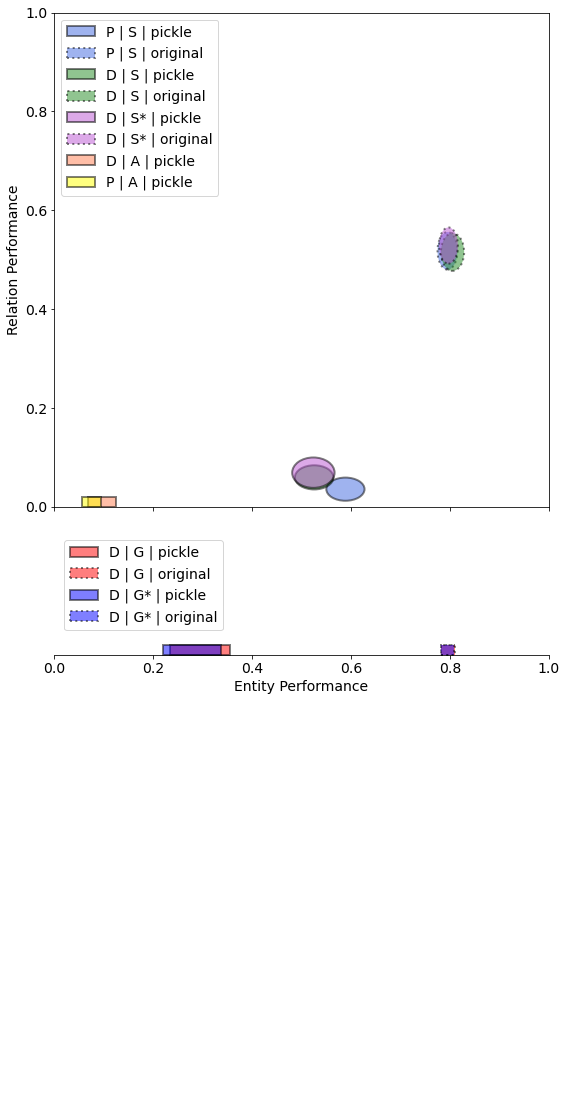

In [170]:
fig, axs = plt.subplots(2, subplot_kw={'aspect': 'equal'}, figsize=(20, 20), sharex=True)

# Make 2D plot for models with both values
for label, ell_tup in f1_full_entries.items():
    
    # Get color & linestyle
    color = full_entry_colors[label]
    if label.split(' | ')[-1] == 'original':
        linestyle = ':'
    else:
        linestyle = '-'
        
    # If the relation performance and CI are zero, need to make a thin rectangle instead of an ellipse
    if 0 in ell_tup:
        rect_x = ell_tup[0] - 0.5*ell_tup[2]
        shape = Rectangle((rect_x, 0), ell_tup[2], 0.02, edgecolor='black', linewidth=2,
                          linestyle=linestyle, facecolor=color, label=label, alpha=0.5)
    else:
        shape = Ellipse((ell_tup[0], ell_tup[1]), ell_tup[2], ell_tup[3], edgecolor='black', linewidth=2,
                        linestyle=linestyle, facecolor=color, label=label, alpha=0.5)
    
    # Add shape to axis
    axs[0].add_artist(shape)

axs[0].set_ylabel('Relation Performance')
axs[0].legend(loc='upper left')

# Make 1D plot for GENIA models
# axs[1].axhline(0.75, 0, 1, color='black')
axs[1].spines['bottom'].set_position(('axes', 0.9))
axs[1].spines['right'].set_color('none')
axs[1].spines['top'].set_color('none')
axs[1].spines['left'].set_color('none')
axs[1].set_yticks([])
axs[1].set_xlabel('Entity Performance')

for label, ell_tup in f1_partial_entries.items():
    
    # Get color & linestyle
    color = full_entry_colors[label]
    if label.split(' | ')[-1] == 'original':
        linestyle = ':'
    else:
        linestyle = '-'
    
    # Make rectangle
    rect_x = ell_tup[0] - 0.5*ell_tup[2]
    shape = Rectangle((rect_x, 0.9), ell_tup[2], 0.02, edgecolor='black', linewidth=2,
                      linestyle=linestyle, facecolor=color, label=label, alpha=0.5)

    # Add shape to axis
    axs[1].add_artist(shape)

axs[1].legend(loc=(0.02,0.95))

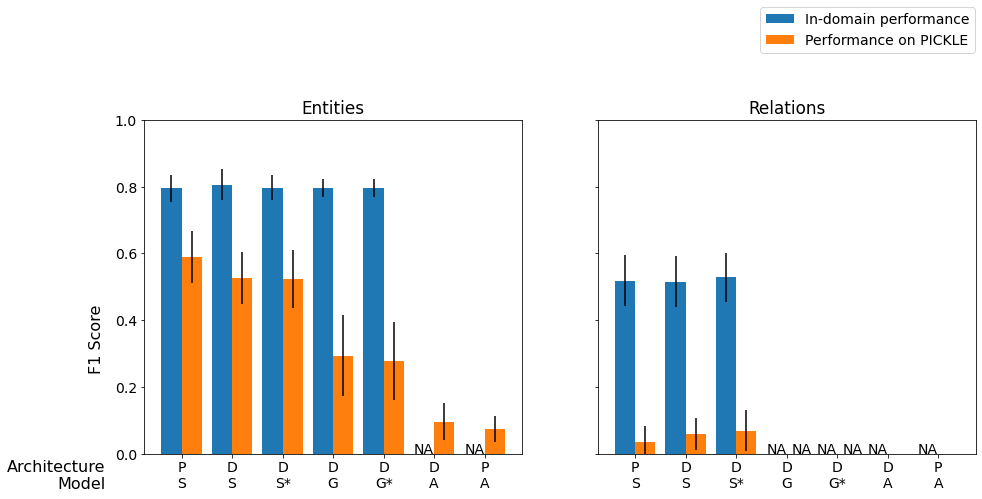

In [87]:
X_axis = np.arange(len(all_perf.index))

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14,8))

axs[0].bar(X_axis - 0.2, all_perf.ent_F1_original, 0.4, yerr=orig_ent_intervals, label = 'In-domain performance')
axs[0].bar(X_axis + 0.2, all_perf.ent_F1_pickle, 0.4, yerr=pickle_ent_intervals, label = 'Performance on PICKLE')
axs[0].set_title('Entities')

# Add NA over bars where original domain performance couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.ent_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[0].annotate(nan_text, (xloc, 0))
        
axs[1].bar(X_axis - 0.2, all_perf.rel_F1_original, 0.4, yerr=orig_rel_intervals, label = 'In-domain performance')
axs[1].bar(X_axis + 0.2, all_perf.rel_F1_pickle, 0.4, yerr=pickle_rel_intervals, label = 'Performance on PICKLE')
axs[1].set_title('Relations')

# Add NA over bars where the model didn't have relation capabilities or original domain performance
# couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.rel_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[1].annotate(nan_text, (xloc, 0))
for i, val in enumerate(all_perf.rel_F1_pickle):
    if np.isnan(val):
        xloc = X_axis[i] + 0.1
        axs[1].annotate(nan_text, (xloc, 0))
    
plt.xticks(ticks=X_axis, labels=labels)
box_text = 'Architecture\nModel'
axs[0].text(-1.5, -0.065, box_text, ha='right', va='center',
                 size=16)
fig.supylabel("F1 Score", fontsize=16)
fig.subplots_adjust(bottom=0.3, left=0.075)
plt.ylim(0,1)
plt.legend(loc=(0.43,1.2))
plt.savefig('../data/straying_off_topic_data/model_performance/paper_fig8_w_errorbars.png', bbox_inches='tight', dpi=600)

### Recall
PURE reports precision and recall values for their pretrained models, but DyGIE++ does not. Adding the recall & precision for PURE here, will put 0 for dygiepp and indicate in the figure legend that 0 means there was no statistic reported.

In [78]:
orig_ent_rec_intervals = get_intervals_w_nan(all_perf.ent_recall_CI_original)
orig_rel_rec_intervals = get_intervals_w_nan(all_perf.rel_recall_CI_original)
pickle_ent_rec_intervals = get_intervals_w_nan(all_perf.ent_recall_CI_pickle)
pickle_rel_rec_intervals = get_intervals_w_nan(all_perf.rel_recall_CI_pickle)

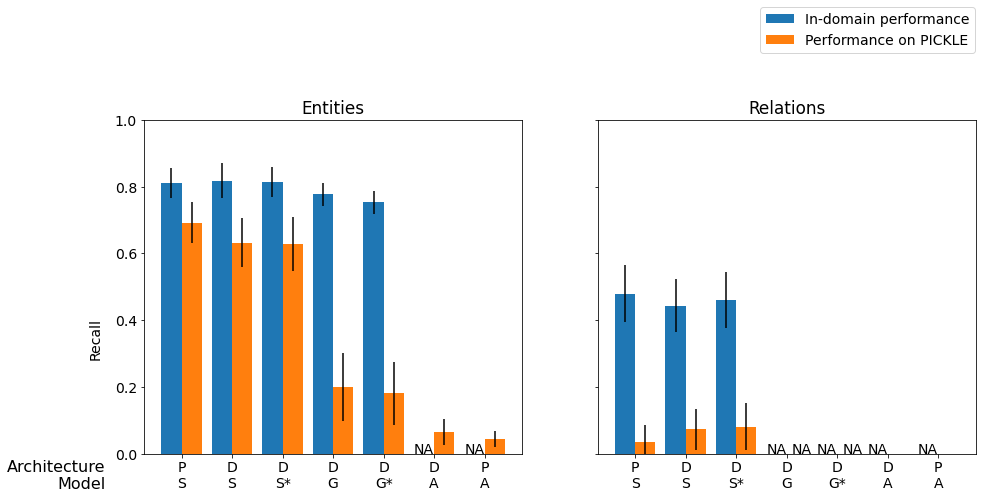

In [88]:
X_axis = np.arange(len(all_perf.index))

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14,8))

axs[0].bar(X_axis - 0.2, all_perf.ent_recall_original, 0.4, yerr=orig_ent_rec_intervals, label = 'In-domain performance')
axs[0].bar(X_axis + 0.2, all_perf.ent_recall_pickle, 0.4, yerr=pickle_ent_rec_intervals, label = 'Performance on PICKLE')
axs[0].set_title('Entities')

# Add NA over bars where original domain performance couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.ent_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[0].annotate(nan_text, (xloc, 0))

axs[1].bar(X_axis - 0.2, all_perf.rel_recall_original, 0.4, yerr=orig_rel_rec_intervals, label = 'In-domain performance')
axs[1].bar(X_axis + 0.2, all_perf.rel_recall_pickle, 0.4, yerr=pickle_rel_rec_intervals, label = 'Performance on PICKLE')
axs[1].set_title('Relations')

# Add NA over bars where the model didn't have relation capabilities or original domain performance
# couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.rel_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[1].annotate(nan_text, (xloc, 0))
for i, val in enumerate(all_perf.rel_F1_pickle):
    if np.isnan(val):
        xloc = X_axis[i] + 0.1
        axs[1].annotate(nan_text, (xloc, 0))
        
plt.xticks(ticks=X_axis, labels=labels)
box_text = 'Architecture\nModel'
axs[0].text(-1.5, -0.065, box_text, ha='right', va='center',
                 size=16)
fig.supylabel("Recall", fontsize=14)
fig.subplots_adjust(bottom=0.3, left=0.075)
plt.ylim(0,1)
plt.legend(loc=(0.43,1.2))
plt.savefig('../data/straying_off_topic_data/model_performance/paper_supp_recall_fig_w_errorbars.png', bbox_inches='tight', dpi=600)

### Precision

In [80]:
orig_ent_prec_intervals = get_intervals_w_nan(all_perf.ent_precision_CI_original)
orig_rel_prec_intervals = get_intervals_w_nan(all_perf.rel_precision_CI_original)
pickle_ent_prec_intervals = get_intervals_w_nan(all_perf.ent_precision_CI_pickle)
pickle_rel_prec_intervals = get_intervals_w_nan(all_perf.rel_precision_CI_pickle)

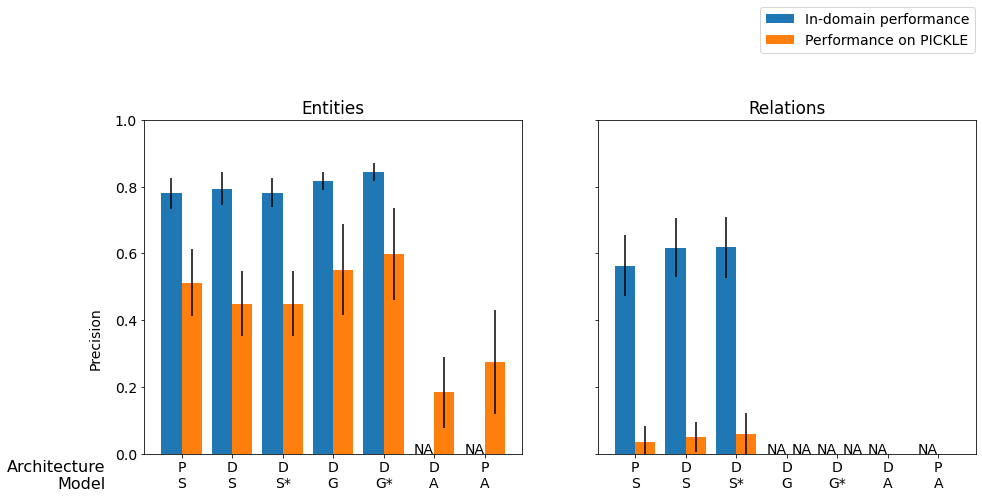

In [89]:
X_axis = np.arange(len(all_perf.index))

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14,8))

axs[0].bar(X_axis - 0.2, all_perf.ent_precision_original, 0.4, yerr=orig_ent_prec_intervals, label = 'In-domain performance')
axs[0].bar(X_axis + 0.2, all_perf.ent_precision_pickle, 0.4, yerr=pickle_ent_prec_intervals, label = 'Performance on PICKLE')
axs[0].set_title('Entities')

# Add NA over bars where original domain performance couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.ent_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[0].annotate(nan_text, (xloc, 0))

axs[1].bar(X_axis - 0.2, all_perf.rel_precision_original, 0.4, yerr=orig_rel_prec_intervals, label = 'In-domain performance')
axs[1].bar(X_axis + 0.2, all_perf.rel_precision_pickle, 0.4, yerr=pickle_rel_prec_intervals, label = 'Performance on PICKLE')
axs[1].set_title('Relations')

# Add NA over bars where the model didn't have relation capabilities or original domain performance
# couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.rel_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[1].annotate(nan_text, (xloc, 0))
for i, val in enumerate(all_perf.rel_F1_pickle):
    if np.isnan(val):
        xloc = X_axis[i] + 0.1
        axs[1].annotate(nan_text, (xloc, 0))

plt.xticks(ticks=X_axis, labels=labels)
box_text = 'Architecture\nModel'
axs[0].text(-1.5, -0.065, box_text, ha='right', va='center',
                 size=16)
fig.supylabel("Precision", fontsize=14)
fig.subplots_adjust(bottom=0.3, left=0.075)
plt.ylim(0,1)
plt.legend(loc=(0.43,1.2))
plt.savefig('../data/straying_off_topic_data/model_performance/paper_supp_precision_fig_w_errorbars.png', bbox_inches='tight', dpi=600)